# Semantic Processing of X-Ray

## Team Members

- **Adithyan S** – CSE22204  
- **Midhru Jayan J** – CSE22336  
- **Sriram V** – CSE22465  



## Importing Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

### Dataset Link

[Click here to access the dataset - chexpert](http://kaggle.com/datasets/ashery/chexpert)

## Preprocessing

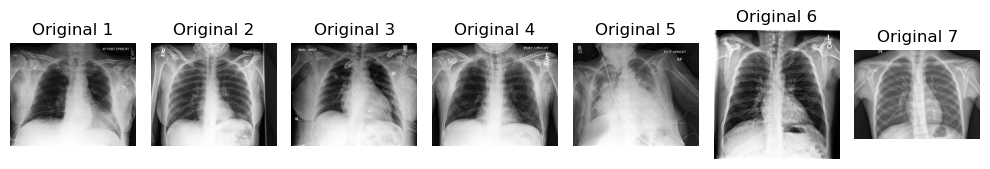

In [33]:
#Load all images from the folder
image_paths = glob.glob(r"Sample Data/*.jpg")

# Check how many images were found
if len(image_paths) != 7:
    print(f"Warning: Expected 7 images, but found {len(image_paths)}.")

# Read images
images = [cv2.imread(img) for img in image_paths]

# Remove any None values (failed loads)
images = [img for img in images if img is not None]

# Check if all images were loaded
if len(images) != 7:
    print(f"Warning: Expected 7 loaded images, but got {len(images)}.")

# Display original and grayscale images
plt.figure(figsize=(10, 5))

for i in range(len(images)):
    # Original Image
    plt.subplot(2, 7, i + 1)  # Change 5 to 7 for correct layout
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(f"Original {i+1}")
    plt.axis("off")

plt.tight_layout()
plt.show()

In [34]:
print(images[0])

[[[  7   7   7]
  [  7   7   7]
  [  7   7   7]
  ...
  [ 11  11  11]
  [ 11  11  11]
  [ 11  11  11]]

 [[  7   7   7]
  [  7   7   7]
  [  7   7   7]
  ...
  [ 11  11  11]
  [ 11  11  11]
  [ 11  11  11]]

 [[  7   7   7]
  [  7   7   7]
  [  7   7   7]
  ...
  [ 11  11  11]
  [ 11  11  11]
  [ 11  11  11]]

 ...

 [[ 66  66  66]
  [ 85  85  85]
  [103 103 103]
  ...
  [ 14  14  14]
  [ 14  14  14]
  [ 14  14  14]]

 [[ 65  65  65]
  [ 96  96  96]
  [106 106 106]
  ...
  [ 14  14  14]
  [ 14  14  14]
  [ 14  14  14]]

 [[ 77  77  77]
  [ 90  90  90]
  [131 131 131]
  ...
  [ 14  14  14]
  [ 14  14  14]
  [ 14  14  14]]]


In [35]:
images[1].shape

(320, 390, 3)

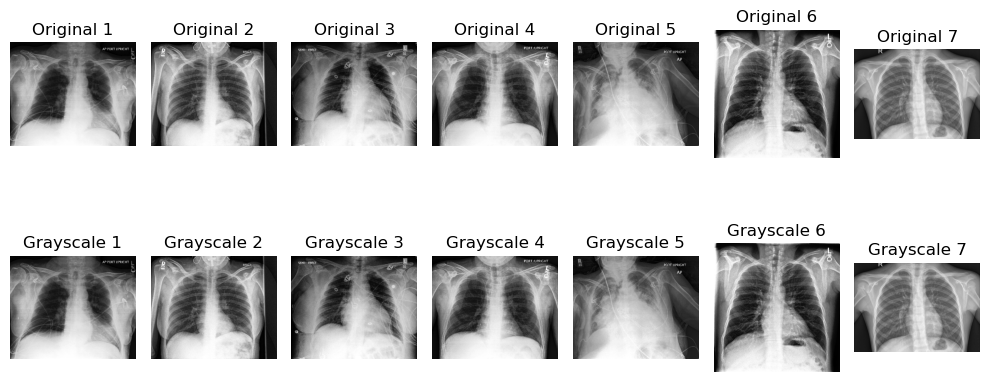

In [37]:
gray_images = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images]

plt.figure(figsize=(10, 5))

for i in range(len(images)): 
    # Original Image
    plt.subplot(2, 7, i + 1)  
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(f"Original {i+1}")
    plt.axis("off")

    # Grayscale Image
    plt.subplot(2, 7, i + 1 + 7)  
    plt.imshow(gray_images[i], cmap="gray")
    plt.title(f"Grayscale {i+1}")
    plt.axis("off")

plt.tight_layout()
plt.show()

In [39]:
print(gray_images[1])

[[ 9  9  9 ... 31 31 28]
 [ 9  9  9 ... 25 25 35]
 [ 9  9  9 ... 21 29 32]
 ...
 [70 56 66 ... 11 23 21]
 [65 59 50 ... 16 27 16]
 [89 54 48 ... 20 27 29]]


In [40]:
gray_images[1].shape

(320, 390)

In [41]:
normalized_images = [img / 255.0 for img in gray_images]

In [42]:
normalized_images

[array([[0.02745098, 0.02745098, 0.02745098, ..., 0.04313725, 0.04313725,
         0.04313725],
        [0.02745098, 0.02745098, 0.02745098, ..., 0.04313725, 0.04313725,
         0.04313725],
        [0.02745098, 0.02745098, 0.02745098, ..., 0.04313725, 0.04313725,
         0.04313725],
        ...,
        [0.25882353, 0.33333333, 0.40392157, ..., 0.05490196, 0.05490196,
         0.05490196],
        [0.25490196, 0.37647059, 0.41568627, ..., 0.05490196, 0.05490196,
         0.05490196],
        [0.30196078, 0.35294118, 0.51372549, ..., 0.05490196, 0.05490196,
         0.05490196]]),
 array([[0.03529412, 0.03529412, 0.03529412, ..., 0.12156863, 0.12156863,
         0.10980392],
        [0.03529412, 0.03529412, 0.03529412, ..., 0.09803922, 0.09803922,
         0.1372549 ],
        [0.03529412, 0.03529412, 0.03529412, ..., 0.08235294, 0.11372549,
         0.1254902 ],
        ...,
        [0.2745098 , 0.21960784, 0.25882353, ..., 0.04313725, 0.09019608,
         0.08235294],
        [0.2

In [21]:
for i, img in enumerate(gray_images):
    print(f"Image {i+1} size: {img.shape}")

Image 1 size: (320, 390)
Image 2 size: (320, 390)
Image 3 size: (320, 390)
Image 4 size: (320, 390)
Image 5 size: (320, 390)
Image 6 size: (328, 320)
Image 7 size: (1317, 1857)


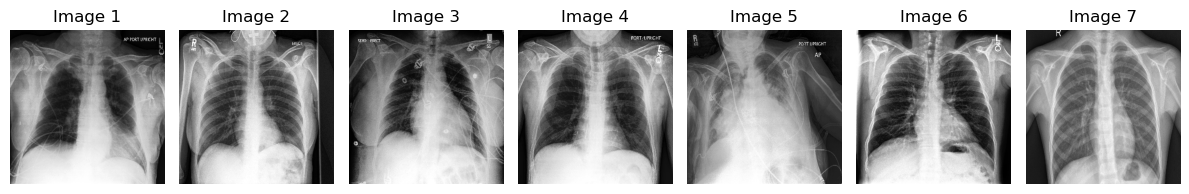

In [23]:
resized_images = [cv2.resize(img, (320, 320), interpolation=cv2.INTER_CUBIC) for img in gray_images]

plt.figure(figsize=(12, 5))

for i in range(7):  # Assuming 6 images
    plt.subplot(1, 7, i + 1)  # 1 row, 6 columns
    plt.imshow(resized_images[i], cmap="gray")
    plt.title(f"Image {i+1}")
    plt.axis("off")

plt.tight_layout()
plt.show()

In [24]:
resized_images

[array([[  7,   7,   7, ...,  11,  11,  11],
        [  7,   7,   7, ...,  11,  11,  11],
        [  7,   7,   7, ...,  11,  11,  11],
        ...,
        [ 68,  92, 109, ...,  14,  14,  14],
        [ 68, 102, 105, ...,  14,  14,  14],
        [ 78, 105, 127, ...,  14,  14,  14]], dtype=uint8),
 array([[ 9,  9,  9, ..., 23, 32, 28],
        [ 9,  9,  9, ..., 28, 24, 34],
        [ 9,  9,  8, ..., 25, 26, 32],
        ...,
        [69, 59, 56, ..., 15, 19, 21],
        [65, 55, 53, ..., 18, 25, 17],
        [86, 48, 50, ..., 20, 25, 29]], dtype=uint8),
 array([[  2,   2,   2, ...,   1,   0,  18],
        [  2,   2,   2, ...,  66, 142, 134],
        [  2,   2,   2, ..., 161, 142, 143],
        ...,
        [  3,  10,  12, ...,  35,  30,  17],
        [  8,   9,  18, ...,  43,  32,  18],
        [  7,   8,  16, ...,  44,  28,  18]], dtype=uint8),
 array([[12,  2,  2, ..., 17, 17, 17],
        [ 2,  2,  3, ..., 17, 17, 17],
        [ 0,  4,  5, ..., 17, 17, 17],
        ...,
        [14,

In [25]:
for i, img in enumerate(resized_images):
    print(f"Image {i+1} size: {img.shape}")

Image 1 size: (320, 320)
Image 2 size: (320, 320)
Image 3 size: (320, 320)
Image 4 size: (320, 320)
Image 5 size: (320, 320)
Image 6 size: (320, 320)
Image 7 size: (320, 320)


## Noise Reduction 

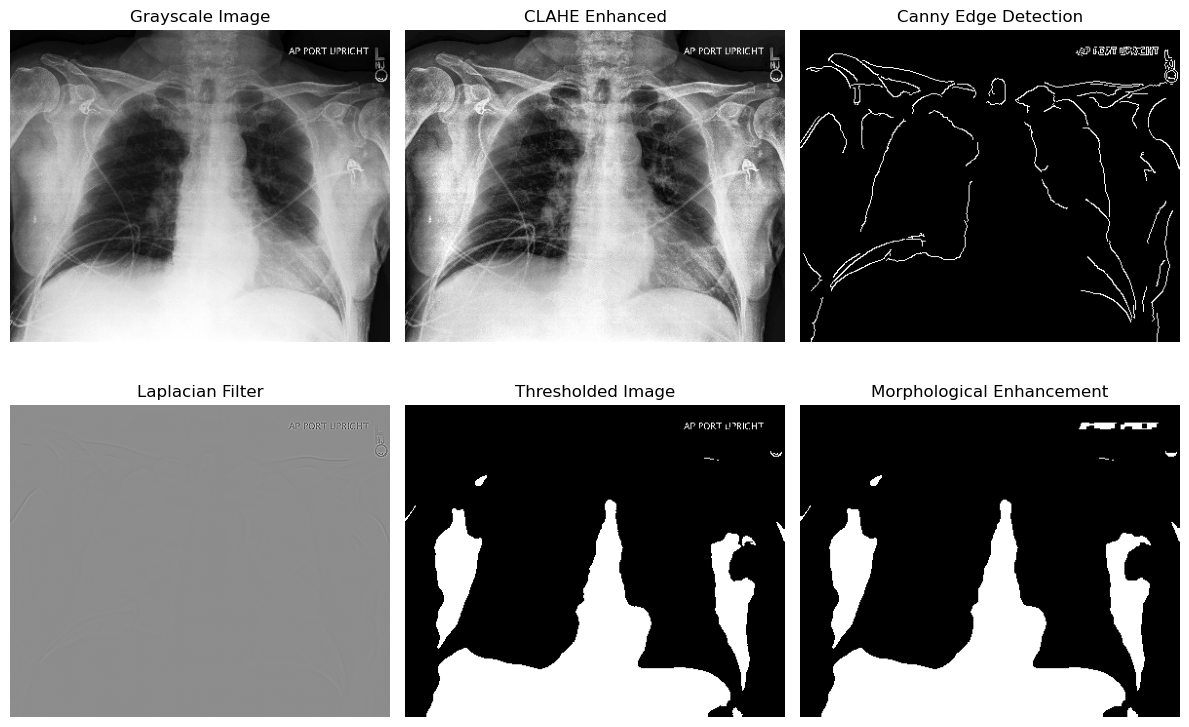

In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("Sample Data/sample1.jpg")  
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_image = clahe.apply(gray)

denoised = cv2.fastNlMeansDenoising(clahe_image, None, 30, 7, 21)

edges = cv2.Canny(denoised, threshold1=50, threshold2=150)

laplacian = cv2.Laplacian(denoised, cv2.CV_64F)

_, thresholded = cv2.threshold(denoised, 200, 255, cv2.THRESH_BINARY)

kernel = np.ones((5, 5), np.uint8)
morphed = cv2.morphologyEx(thresholded, cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(clahe_image, cmap='gray')
plt.title("CLAHE Enhanced")
plt.axis("off")

plt.subplot(2, 3, 3)
plt.imshow(edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis("off")

plt.subplot(2, 3, 4)
plt.imshow(laplacian, cmap='gray')
plt.title("Laplacian Filter")
plt.axis("off")

plt.subplot(2, 3, 5)
plt.imshow(thresholded, cmap='gray')
plt.title("Thresholded Image")
plt.axis("off")

plt.subplot(2, 3, 6)
plt.imshow(morphed, cmap='gray')
plt.title("Morphological Enhancement")
plt.axis("off")

plt.tight_layout()
plt.show()


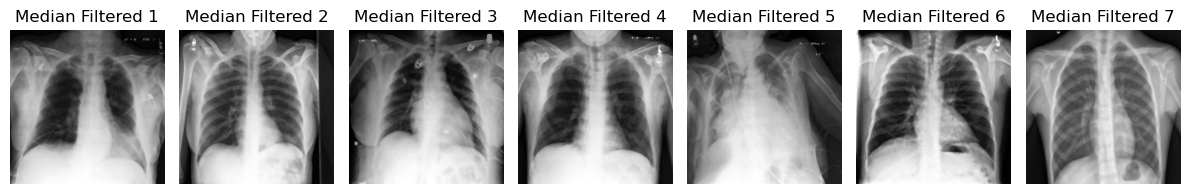

In [26]:
#Preserves edges as weel as the same time reduces noise
median_filtered_images = [cv2.medianBlur(img, 5) for img in resized_images]

plt.figure(figsize=(12, 5))

for i in range(7): 
    plt.subplot(1, 7, i + 1) 
    plt.imshow(median_filtered_images[i], cmap="gray")
    plt.title(f"Median Filtered {i+1}")
    plt.axis("off")

plt.tight_layout()
plt.show()

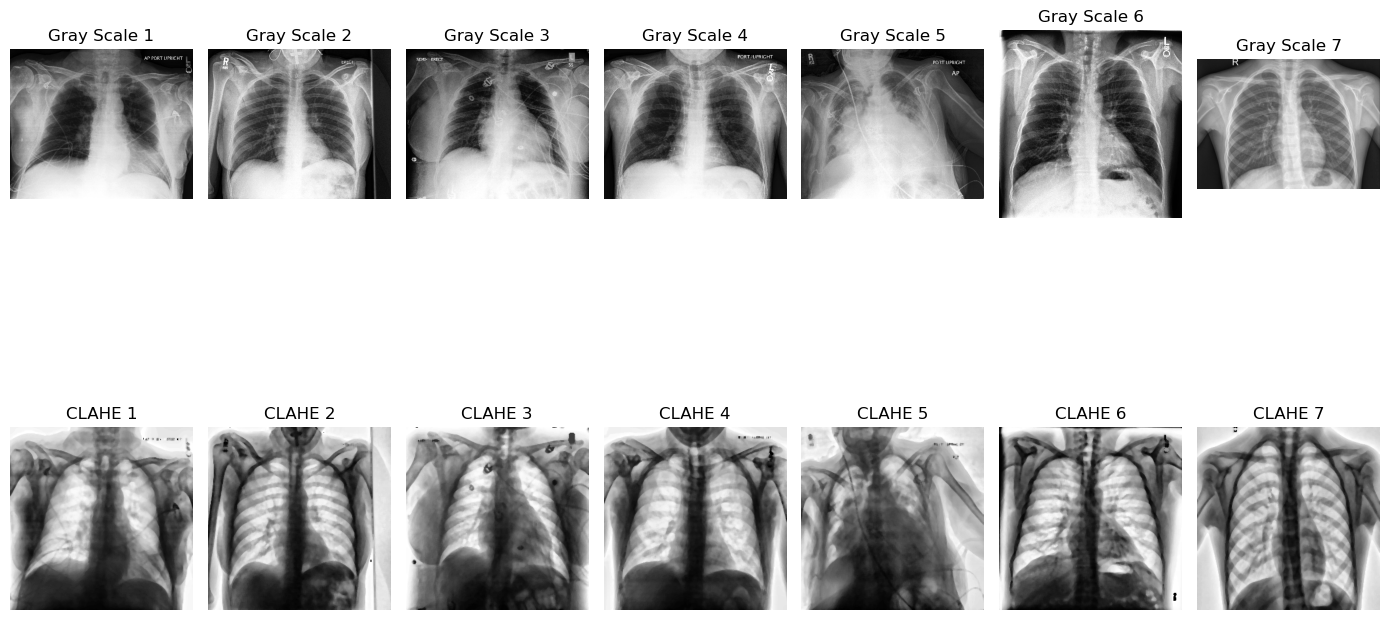

In [30]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

clahe_images = [clahe.apply((img * 255).astype(np.uint8)) for img in median_filtered_images]

plt.figure(figsize=(14, 10)) 

for i in range(7): 
    plt.subplot(2, 7, i + 1)  
    plt.imshow(gray_images[i], cmap="gray")
    plt.title(f"Gray Scale {i+1}")
    plt.axis("off")

for i in range(7):  
    plt.subplot(2, 7, i + 8)  
    plt.imshow(clahe_images[i], cmap="gray")
    plt.title(f"CLAHE {i+1}")
    plt.axis("off")

plt.tight_layout()
plt.show()
